# 🎯💻 Financial Sentiment Analysis Using Spacy and Word2Vec

# 1. 📌 Installing and Importing Libraries

In [16]:
# Installing Gensim Library
# !pip install --upgrade gensim -q

In [17]:
# Basic Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing Library
import spacy
import re

# Word2Vec Model Library
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

# Models Libraries
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. 💉 Importing Dataset

In [18]:
df = pd.read_csv('../data/FiQA.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [19]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [21]:
df.shape

(5842, 2)

So, Our dataset has 5842 records with no null valued record. The output classes are - {'Positive', 'Negative', 'Neutral'}

# 3. 🔭 Exploratory Data Analysis

/Users/yiyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sentiment', ylabel='count'>

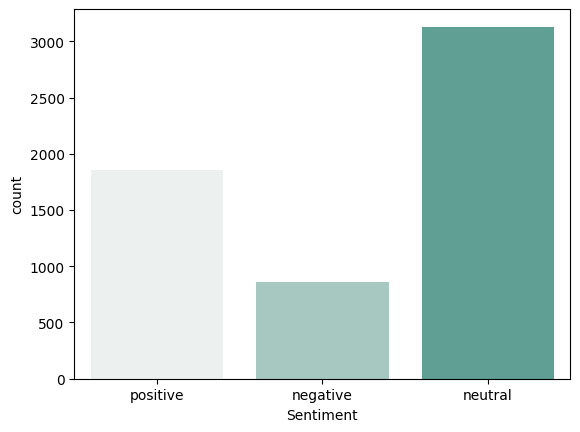

In [22]:
sns.countplot(data=df, x='Sentiment', palette='light:#5A9')

In [23]:
df['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

So we have total of 5842 records of which - 
<br>Neutral records are 3130 - <b>53.57% </b>
<br>Positive records are 1852 - <b>31.7% </b>
<br>negative records are 860 - <b>14.72% </b>

# 4. ChatGPT

In [24]:
API_KEY = ""
import os
import openai
import pandas as pd
openai.api_key = API_KEY

In [25]:
def get_sentiment_completion(question, model="gpt-4"):
    system_analysis_prompt =  "You will work as a Sentiment Analysis for Financial News. You will only answer as: \n\n BEARISH, BULLISH, NEUTRAL. No further explanation=."
    messages = []
    messages = [{"role": "system", "content": system_analysis_prompt}]
    messages.append({"role": "user", "content":question})
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    # print(response)
    return response.choices[0].message["content"]

In [26]:
testing = []
for i in df["Sentence"][::50]:
    testing.append(i)

In [27]:
pool_outputs = []
count = 0
for i in testing:
    count += 1
    print(count)
    pool_outputs.append(get_sentiment_completion(i))

1


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


In [28]:
# from tqdm import tqdm
# from multiprocess import Pool

# max_pool = 5

# with Pool(max_pool) as p:
#     pool_outputs = list(
#         tqdm(
#             p.imap(get_sentiment_completion,
#                    testing),
#             total=len(testing)
#         )
#     )    


In [29]:

dic_df = {
    "positive":1,
    "neutral":0,
    "negative":-1,
}
testing_Y = []
for i in df["Sentiment"][::50]:
    testing_Y.append(dic_df[i])
len(testing_Y)


117

In [30]:
dic_gpt = {
    "BULLISH" : 1,
    "NEUTRAL" : 0,
    "BEARISH" : -1,
}

output_gpt = [dic_gpt[output] for output in pool_outputs]
output_gpt

[1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 0,
 1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1]

In [31]:
sum(np.array(output_gpt) == np.array(testing_Y)) / len(output_gpt)

0.6923076923076923

In [32]:
sum(np.array(output_gpt) == -1)

35

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_Y, output_gpt)

array([[14,  1,  0],
       [19, 39, 11],
       [ 2,  3, 28]])

In [36]:
sum(np.array(testing_Y) == 0)

69

In [35]:
testing_Y

[1,
 1,
 1,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0]